# Advance Plotting with Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/tips.csv')

print(df.shape)

df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic Data Check

In [3]:
df.shape

(244, 7)

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [6]:
# Missing Value Check
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Univariate - Non Visual Statistical Analysis

In [8]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [13]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [14]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [15]:
discrete_univariate_analysis(discrete_df)

********** sex **********
count                 244
nunique                 2
unique     [Female, Male]
Name: sex, dtype: object
Value Counts: 
 sex
Male      157
Female     87
Name: count, dtype: int64

********** smoker **********
count            244
nunique            2
unique     [No, Yes]
Name: smoker, dtype: object
Value Counts: 
 smoker
No     151
Yes     93
Name: count, dtype: int64

********** day **********
count                        244
nunique                        4
unique     [Sun, Sat, Thur, Fri]
Name: day, dtype: object
Value Counts: 
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

********** time **********
count                  244
nunique                  2
unique     [Dinner, Lunch]
Name: time, dtype: object
Value Counts: 
 time
Dinner    176
Lunch      68
Name: count, dtype: int64



In [16]:
numerical_univariate_analysis(numerical_df)

********** total_bill **********
count     244.000000
min         3.070000
max        50.810000
mean       19.785943
median     17.795000
std         8.902412
skew        1.133213
Name: total_bill, dtype: float64

********** tip **********
count     244.000000
min         1.000000
max        10.000000
mean        2.998279
median      2.900000
std         1.383638
skew        1.465451
Name: tip, dtype: float64

********** size **********
count     244.000000
min         1.000000
max         6.000000
mean        2.569672
median      2.000000
std         0.951100
skew        1.447882
Name: size, dtype: float64



## Bivariate - Non Visual Statistical Analysis

In [17]:
# num vs num

numerical_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [19]:
# cat vs cat

pd.crosstab(discrete_df['sex'], discrete_df['smoker'], normalize='index')

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


In [20]:
# num vs cat

g = df.groupby('sex')

g['total_bill'].agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
Female,3.07,44.30,18.056897
Male,7.25,50.81,20.744076


## Univariate Plotting For Numerical Columns - Histogram, KDE, CDF and Box Plot

In [ ]:
# total_bill - Histogram and Box plot + kde and ecdf

<Axes: xlabel='total_bill', ylabel='Count'>

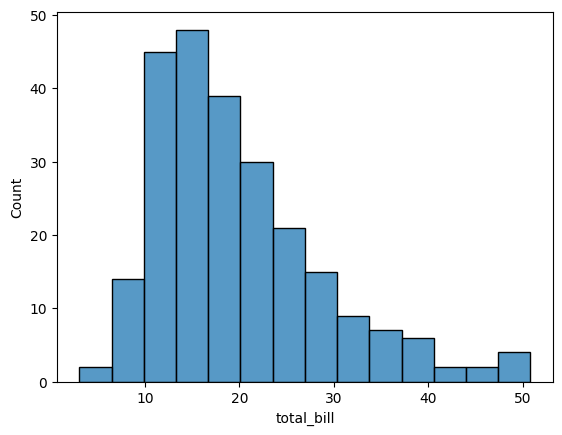

In [21]:
sns.histplot(data=df, x="total_bill")

<Axes: xlabel='total_bill'>

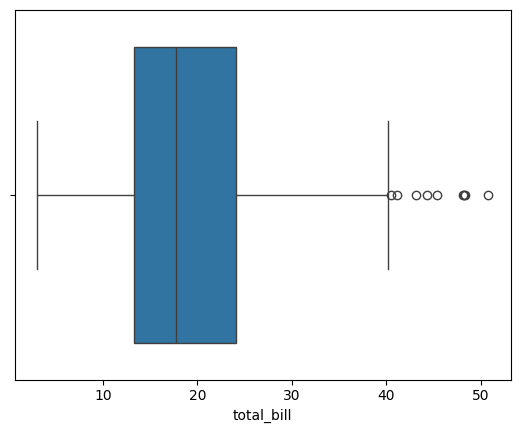

In [22]:
sns.boxplot(data=df, x="total_bill")

<Axes: xlabel='total_bill', ylabel='Density'>

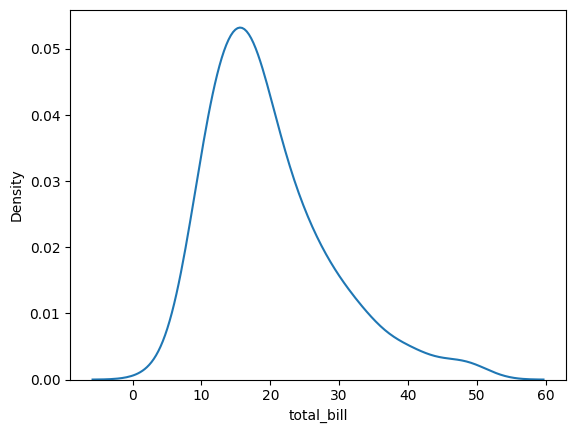

In [26]:
sns.kdeplot(data=df, x="total_bill")

<Axes: xlabel='total_bill', ylabel='Proportion'>

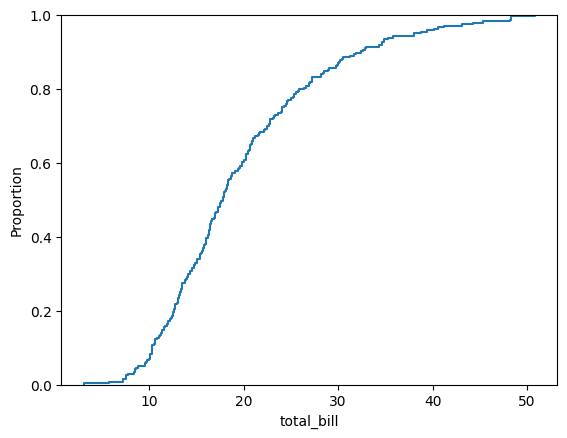

In [27]:
sns.ecdfplot(data=df, x="total_bill")

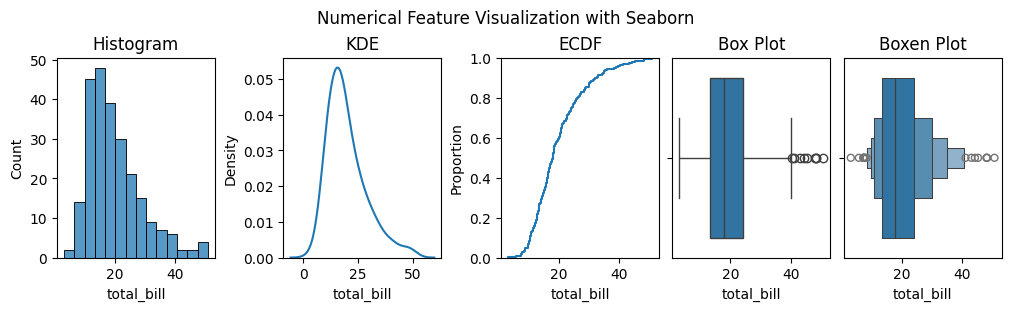

In [34]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='total_bill', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df, x='total_bill', ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df, x='total_bill', ax=axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data=df, x='total_bill', ax=axs[3])

axs[4].set_title("Boxen Plot")
sns.boxenplot(data=df, x='total_bill', ax=axs[4])

plt.show()

## Univariate Plotting For Categorical Columns - Count Plot

<Axes: xlabel='day', ylabel='count'>

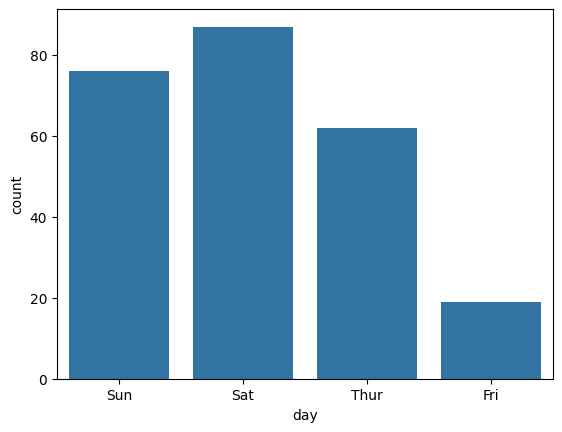

In [35]:
sns.countplot(data=df, x='day')

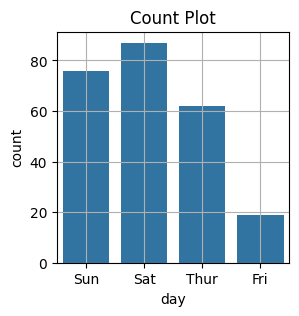

In [36]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='day', ax=ax)

plt.grid(True)

plt.show()

## Bivariate Plotting For Num vs Num Columns - Line Plot, Scatter Plot, Hexbin Plot, Heat Map and Pair Plot 

<Axes: xlabel='total_bill', ylabel='tip'>

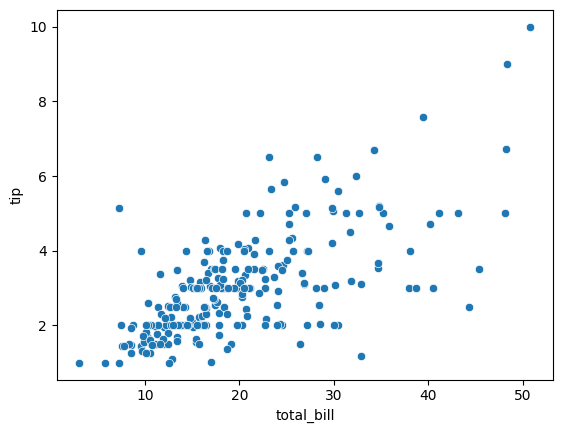

In [37]:
sns.scatterplot(data=df, x='total_bill', y='tip')

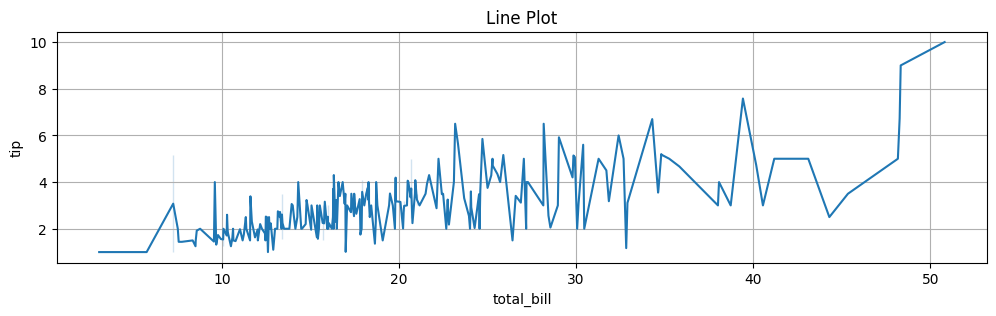

In [11]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=ax)

plt.grid(True)

plt.show()

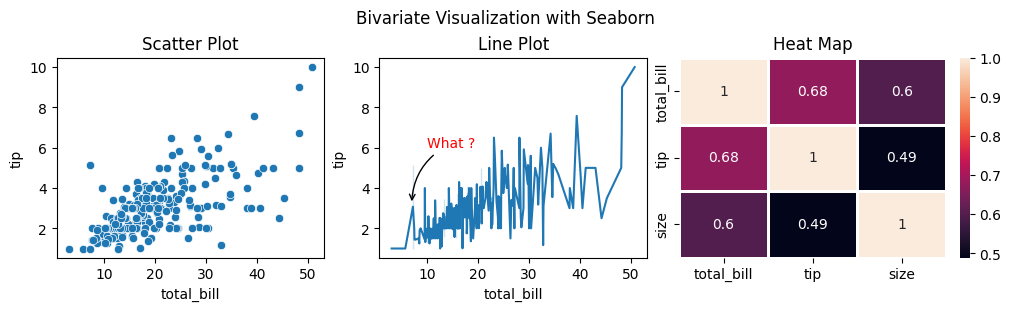

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df, x='total_bill', y='tip', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

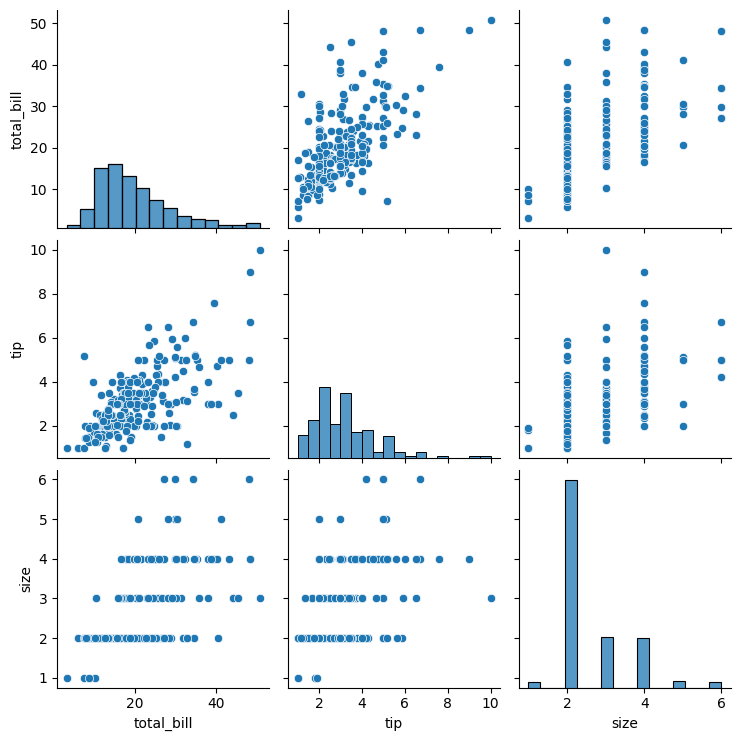

In [54]:
sns.pairplot(df)

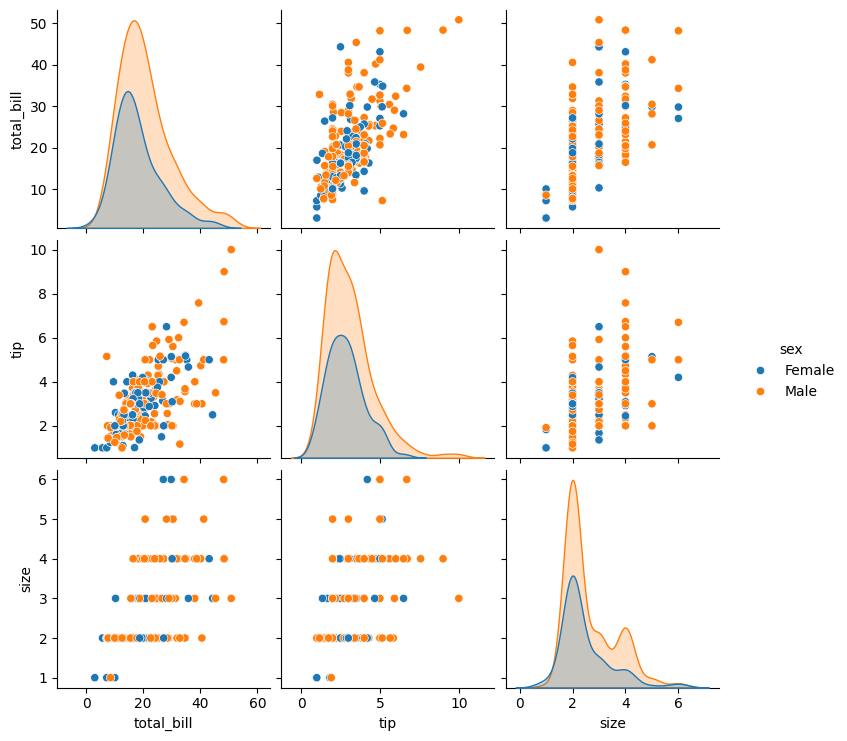

In [55]:
sns.pairplot(df, hue="sex")

## Bivariate Plotting For Num vs Categorical Columns - Box Plot, Violin Plot, Boxen Plot and Histogram Plot

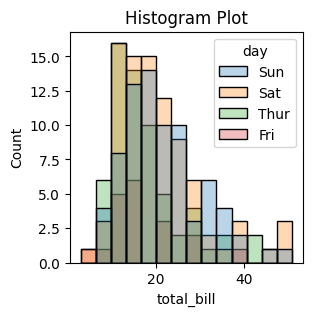

In [26]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='total_bill', hue="day", alpha=0.3, ax=ax)

plt.show()

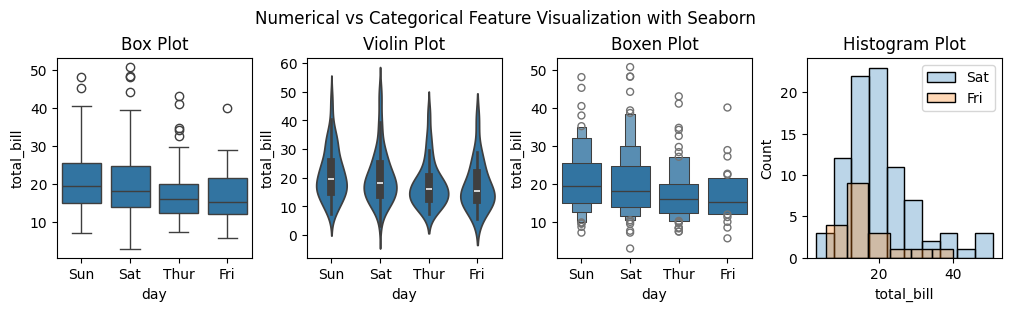

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df, x='day', y='total_bill', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df, x='day', y='total_bill', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df, x='day', y='total_bill', ax=axs[2])

axs[3].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['day']=="Sat"], x='total_bill', alpha=0.3, ax=axs[3], label="Sat")
sns.histplot(data=df.loc[df['day']=="Fri"], x='total_bill', alpha=0.3, ax=axs[3], label="Fri")
axs[3].legend()

plt.show()

## Multi-plot Grid using FacetGrid

Let's answer this question:  
<b>Which gender pays more?</b>

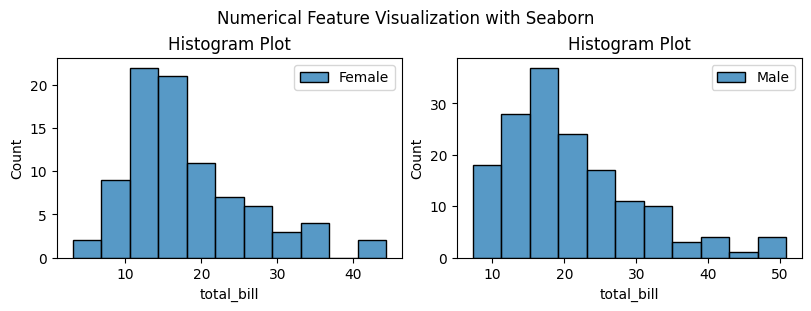

In [40]:
# Implementation without FacetGrid

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Female'], x='total_bill', ax=axs[0], label="Female")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Male'], x='total_bill', ax=axs[1], label="Male")
axs[1].legend()

plt.show()

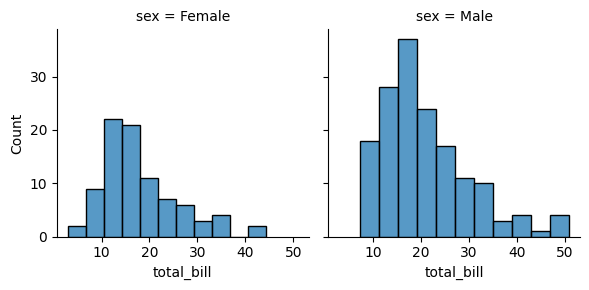

In [35]:
grid = sns.FacetGrid(df, col="sex")
grid.map(sns.histplot, "total_bill")

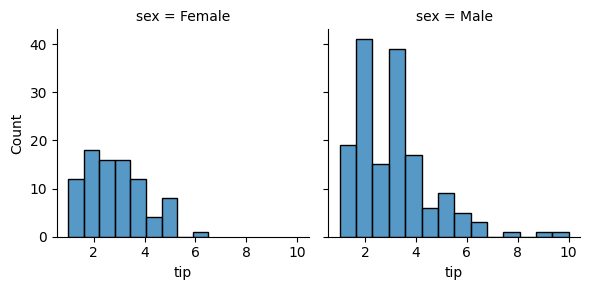

In [41]:
grid = sns.FacetGrid(df, col="sex")
grid.map(sns.histplot, "tip")

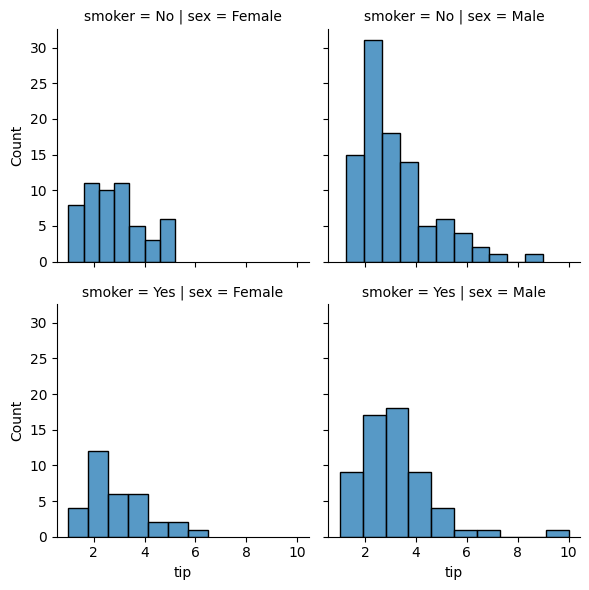

In [42]:
grid = sns.FacetGrid(df, col="sex", row="smoker")
grid.map(sns.histplot, "tip")

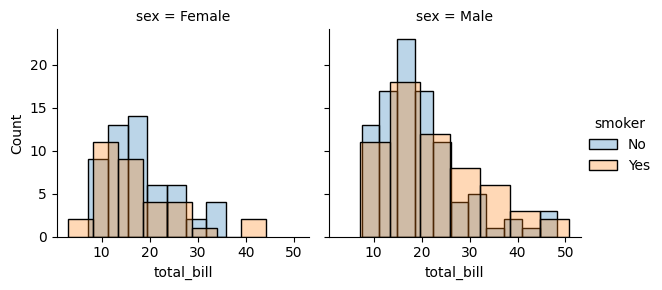

In [45]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.histplot, "total_bill", alpha=.3)
g.add_legend()

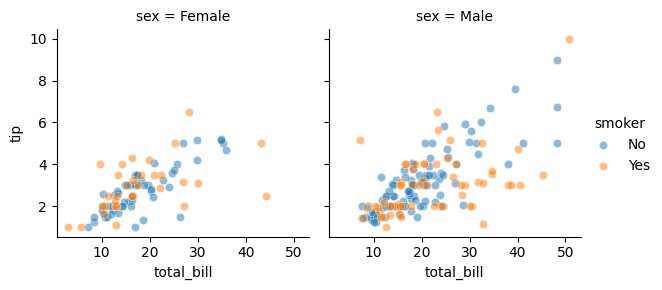

In [48]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.5)
g.add_legend()

## Bivariate Plotting For Cat vs Categorical Columns - Grouped Count Plot

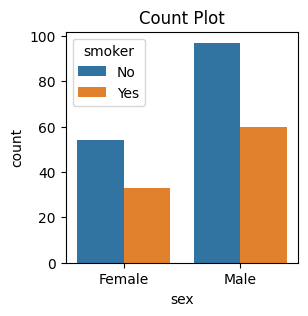

In [56]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='smoker', ax=ax)

plt.show()